# Texas Crash Data 2016

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle

In [2]:
# create df from csv file and take a look
df = pd.read_csv('crash_2016z.csv')
print('shape:', df.shape)
df.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


shape: (630720, 27)


,Crash_Fatal,Cmv_Involv,Schl_Bus,Active_School_Zone,Crash_Date,Crash_Time,Outside_City_Limit,Private_Dr_Fl,Toll_Road_Fl,Crash_Speed_Limit,...,Street_Name,Street_Nbr,Day_of_Week,Incap_Injry_Cnt,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt
0,N,N,N,N,1/5/2016,10:59 AM,N,N,N,35,...,S ZARZAMORA ST,2307.0,TUE,0,0,0,2,0,0,0
1,N,N,N,N,1/30/2016,4:13 PM,N,N,N,35,...,SE 25TH AVE,711.0,SAT,0,0,0,5,0,0,0
2,N,N,N,N,2/9/2016,11:54 PM,N,N,N,25,...,LINNWOOD DR,NaN,TUE,0,0,0,1,0,0,0
3,N,N,N,N,1/1/2016,12:46 AM,N,N,N,40,...,IH0035E,NaN,FRI,0,0,0,3,0,0,0
4,N,N,N,N,1/1/2016,12:32 AM,N,N,N,35,...,SH0075,NaN,FRI,0,0,0,4,1,0,0


In [3]:
# too many colums to delete, need to delete before bringing in csv file.
# deleting columns not needed for my review
# df = df.drop(columns=['Investigat_Service_ID', 'Investigat_DA_ID', 'Investigator_Narrative', 'Standstop',
#                'Yield', 'Poscrossing_ID', 'WDCode_ID', 'CrossingNumber', 'RRCo', 'Bridge_Rte_Struct_Func_ID',
#'Bridge_IR_Struct_Func_ID', 'Deck_Width', 'Bridge_Dir_Of_Traffic_ID', 'Culvert_Type_ID', 'Roadway_Width',
#                'Bridge_Srvc_Type_On_ID', 'Bridge_Srvc_Type_Under_ID', 'Bridge_Loading_Type_ID', 'Bridge_Loading_In_1000_Lbs',
#                'Approach_Width', 'Bridge_Median_ID', 'Structure_Number', 'I_R_Min_Vert_Clear', 'Dd_Degr',
#                'Feature_Crossed', 'Cd_Degr', 'Delta_Left_Right_ID', 'Curve_Type_ID', 'Curve_Lngth', 'Shldr_Use_Left_ID',
#                'Approach_Width', 'Bridge_Rte_Struct_Func_ID', 'Shldr_Use_Right_ID', 'Othr_Factr_ID', 'Bridge_Srvc_Type_On_ID',
#                'Bridge_Srvc_Type_Under_ID', 'Road_Algn_ID', 'Delta_Left_Right_ID', 'Cd_Degr', 'Delta_Left_Right_ID',
#                'Dd_Degr'])  

In [4]:
# look at some of the df details of the types in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630720 entries, 0 to 630719
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Crash_Fatal             630720 non-null  object 
 1   Cmv_Involv              630720 non-null  object 
 2   Schl_Bus                630720 non-null  object 
 3   Active_School_Zone      630720 non-null  object 
 4   Crash_Date              630720 non-null  object 
 5   Crash_Time              630720 non-null  object 
 6   Outside_City_Limit      630720 non-null  object 
 7   Private_Dr_Fl           630720 non-null  object 
 8   Toll_Road_Fl            630720 non-null  object 
 9   Crash_Speed_Limit       630720 non-null  int64  
 10  Road_Constr_Zone        630720 non-null  object 
 11  Road_Constr_Zone_Wrkr   630720 non-null  object 
 12  Investigat_Notify_Time  630720 non-null  object 
 13  Investigat_Arrv_Time    630720 non-null  object 
 14  Report_Date         

In [5]:
print('There are %d missing values in total.' % df.isna().sum().sum())

There are 453641 missing values in total.


In [6]:
# changing N and Y to 0 and 1
df = df.replace(to_replace=['N', 'Y'], value=[0,1])

In [7]:
df = df.astype({'Crash_Fatal': 'int64'})

In [8]:
# fill in blank data which is not dtype int64 with 0
df = df.fillna(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630720 entries, 0 to 630719
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Crash_Fatal             630720 non-null  int64  
 1   Cmv_Involv              630720 non-null  int64  
 2   Schl_Bus                630720 non-null  int64  
 3   Active_School_Zone      630720 non-null  int64  
 4   Crash_Date              630720 non-null  object 
 5   Crash_Time              630720 non-null  object 
 6   Outside_City_Limit      630720 non-null  int64  
 7   Private_Dr_Fl           630720 non-null  int64  
 8   Toll_Road_Fl            630720 non-null  int64  
 9   Crash_Speed_Limit       630720 non-null  int64  
 10  Road_Constr_Zone        630720 non-null  int64  
 11  Road_Constr_Zone_Wrkr   630720 non-null  int64  
 12  Investigat_Notify_Time  630720 non-null  object 
 13  Investigat_Arrv_Time    630720 non-null  object 
 14  Report_Date         

In [10]:
#get some detail on the numbers
df.describe()

,Crash_Fatal,Cmv_Involv,Schl_Bus,Active_School_Zone,Outside_City_Limit,Private_Dr_Fl,Toll_Road_Fl,Crash_Speed_Limit,Road_Constr_Zone,Road_Constr_Zone_Wrkr,Latitude,Longitude,Incap_Injry_Cnt,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt
count,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000,630720.000000
mean,0.005495,0.061249,0.004593,0.005739,0.191663,0.064449,0.016004,40.823914,0.042694,0.014864,28.219115,-89.238869,0.028471,0.132583,0.268706,2.009289,0.179070,0.429760,0.006080
std,0.073926,0.239787,0.067617,0.075542,0.393610,0.245550,0.125490,18.171931,0.202167,0.121008,8.699321,26.998819,0.199019,0.459865,0.687584,1.926289,0.447161,0.851072,0.087325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-106.633995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,29.511571,-97.967222,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,30.018876,-96.822971,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,32.639664,-95.409453,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,1.000000,1.000000,36.498356,0.000000,8.000000,40.000000,51.000000,105.000000,45.000000,51.000000,9.000000


In [14]:
df.head()

,Crash_Fatal,Cmv_Involv,Schl_Bus,Active_School_Zone,Crash_Date,Crash_Time,Outside_City_Limit,Private_Dr_Fl,Toll_Road_Fl,Crash_Speed_Limit,...,Street_Name,Street_Nbr,Day_of_Week,Incap_Injry_Cnt,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt
0,0,0,0,0,1/5/2016,10:59 AM,0,0,0,35,...,S ZARZAMORA ST,2307.0,TUE,0,0,0,2,0,0,0
1,0,0,0,0,1/30/2016,4:13 PM,0,0,0,35,...,SE 25TH AVE,711.0,SAT,0,0,0,5,0,0,0
2,0,0,0,0,2/9/2016,11:54 PM,0,0,0,25,...,LINNWOOD DR,0,TUE,0,0,0,1,0,0,0
3,0,0,0,0,1/1/2016,12:46 AM,0,0,0,40,...,IH0035E,0,FRI,0,0,0,3,0,0,0
4,0,0,0,0,1/1/2016,12:32 AM,0,0,0,35,...,SH0075,0,FRI,0,0,0,4,1,0,0


In [15]:
# check the counts for the first df
df.value_counts()

Crash_Fatal  Cmv_Involv  Schl_Bus  Active_School_Zone  Crash_Date  Crash_Time  Outside_City_Limit  Private_Dr_Fl  Toll_Road_Fl  Crash_Speed_Limit  Road_Constr_Zone  Road_Constr_Zone_Wrkr  Investigat_Notify_Time  Investigat_Arrv_Time  Report_Date  Latitude   Longitude   Street_Name      Street_Nbr  Day_of_Week  Incap_Injry_Cnt  Nonincap_Injry_Cnt  Poss_Injry_Cnt  Non_Injry_Cnt  Unkn_Injry_Cnt  Tot_Injry_Cnt  Death_Cnt
0            0           0         0                   4/19/2016   8:14 AM     0                   0              0              40                0                 0                      8:16 AM                 8:21 AM               4/19/2016    29.500359  -95.126504  FM0518           0           TUE          0                0                   1               1              0               1              0            2
                                                       4/12/2016   10:35 PM    0                   0              0              60                0     

In [16]:
wrangle.summarize(df)

There are total of 0 missing values in the entire dataframe.

-------------------


Dataframe head: 
|    |   Crash_Fatal |   Cmv_Involv |   Schl_Bus |   Active_School_Zone | Crash_Date   | Crash_Time   |   Outside_City_Limit |   Private_Dr_Fl |   Toll_Road_Fl |   Crash_Speed_Limit |   Road_Constr_Zone |   Road_Constr_Zone_Wrkr | Investigat_Notify_Time   | Investigat_Arrv_Time   | Report_Date   |   Latitude |   Longitude | Street_Name    |   Street_Nbr | Day_of_Week   |   Incap_Injry_Cnt |   Nonincap_Injry_Cnt |   Poss_Injry_Cnt |   Non_Injry_Cnt |   Unkn_Injry_Cnt |   Tot_Injry_Cnt |   Death_Cnt |
|---:|--------------:|-------------:|-----------:|---------------------:|:-------------|:-------------|---------------------:|----------------:|---------------:|--------------------:|-------------------:|------------------------:|:-------------------------|:-----------------------|:--------------|-----------:|------------:|:---------------|-------------:|:--------------|------------------:|-

NameError: name 'nulls_by_col' is not defined

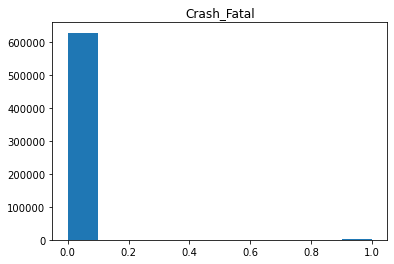

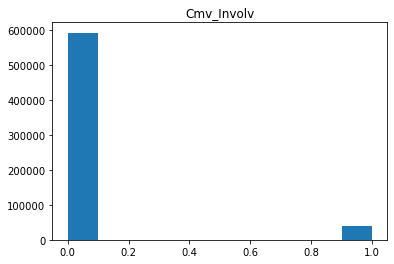

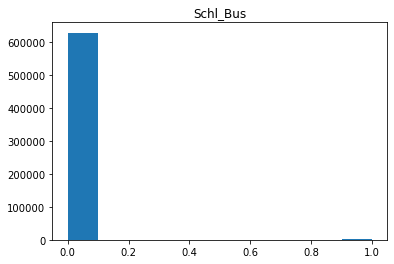

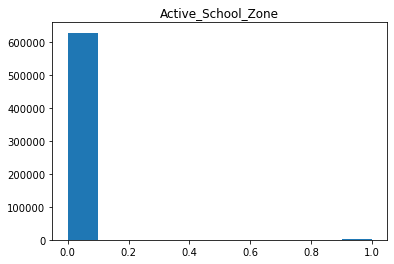

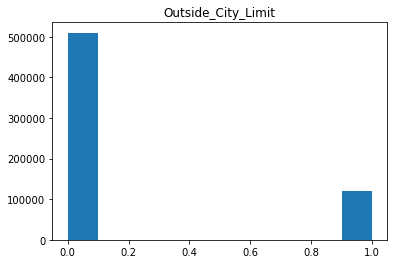

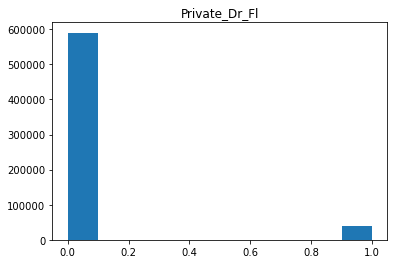

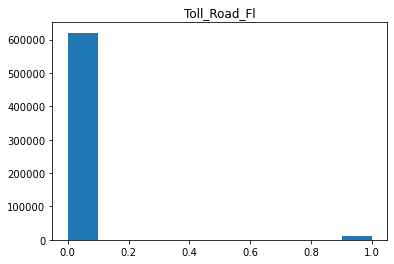

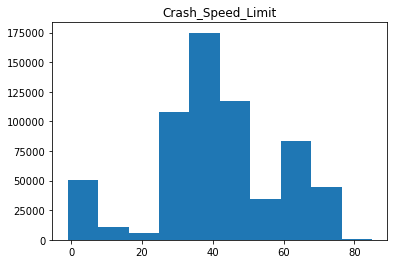

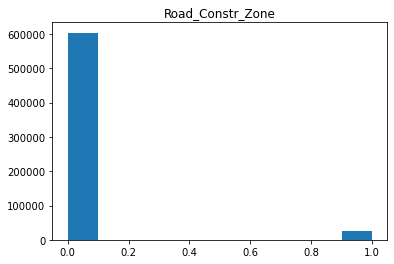

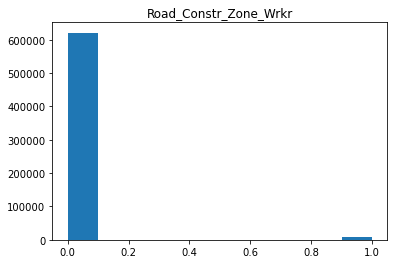

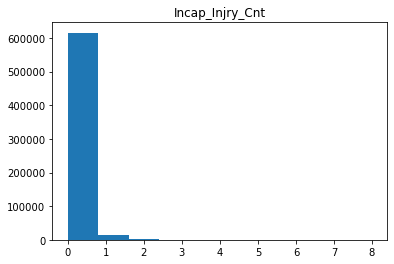

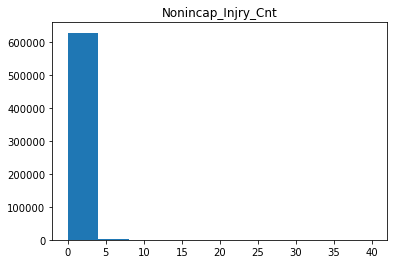

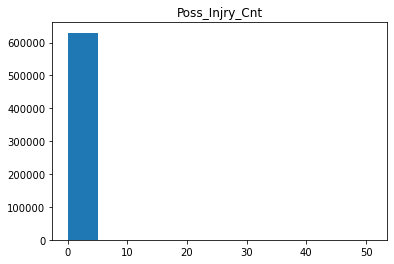

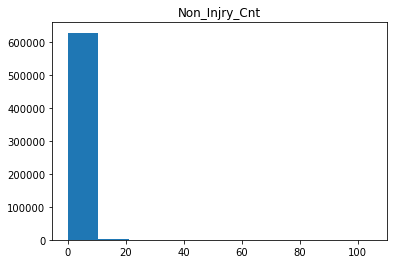

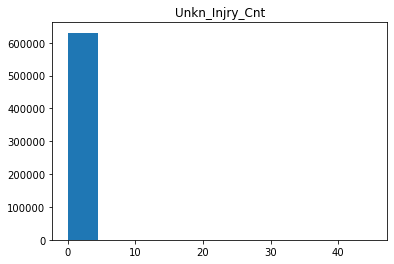

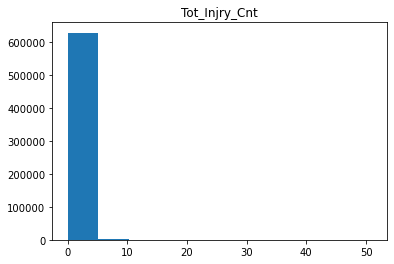

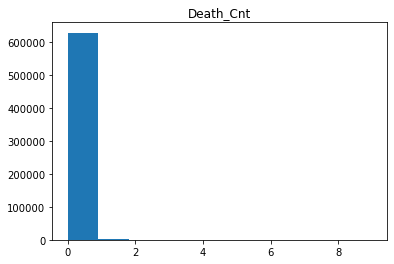

In [17]:
num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [18]:
# setting a function to split the data to use in a wrangle.py file
# splitting the df to build models to test
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [20]:
# Stratify with categorical target variables
train, validate, test = train_validate_test_split(df, target='Crash_Fatal')
train.shape, validate.shape, test.shape

NameError: name 'train_test_split' is not defined